In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [42]:
train = pd.read_csv('Train.csv')
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,5.0,Boring,Electric,200.0,2.0,NaN,NaN,NaN,NaN,2,Urea,NaN,20.0,Broadcasting,Urea,15.0,18.0,NaN,NaN,Broadcasting,machine,2022-11-16,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTracRotavator,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,5.0,Boring,Electric,125.0,3.0,NaN,NaN,NaN,NaN,2,DAP Urea,15.0,10.0,Broadcasting,Urea,20.0,39.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability LabourAvailability,SeedlingAge IrrigWaterAvailability LaborAvailability,4.0,Boring,Electric,80.0,2.0,Ganaura FYM,1.0,1.0,SoilApplied,2,DAP,4.0,NaN,SoilApplied,Urea,5.0,65.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,NaN,NaN,NaN,NaN,NaN,Ganaura,1.0,NaN,SoilApplied,2,DAP Urea,6.0,3.0,Broadcasting,Urea,5.0,5.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvailability,SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,9.0,Boring,Electric,300.0,2.0,NaN,NaN,NaN,NaN,2,Urea DAP,15.0,30.0,Broadcasting,Urea,30.0,26.0,NaN,NaN,Broadcasting,machine,2022-11-30,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


In [3]:
print("The dataset has {} rows and {} columns.".format(train.shape[0], train.shape[1]), '\n')
print("The dataset has {} duplicate rows.".format(train.duplicated().sum()), '\n')
print("The dataset has {} missing values.".format(train.isnull().sum().sum()))

The dataset has 3870 rows and 44 columns. 

The dataset has 0 duplicate rows. 

The dataset has 20803 missing values.


In [43]:
pd.set_option('display.max_columns', None)
test = pd.read_csv('Test.csv')
test.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,Ganaura,CropOrgFYM,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre
0,ID_F9XXEXN2ADR2,Jamui,Khaira,20,13,TractorPlough,2022-07-24,4,Manual_PuddledLine,2022-07-03,2022-07-29,1.0,LabourAvailability IrrigWaterAvailability PreMonsoonShowers,IrrigWaterAvailability LaborAvailability RainArrival SeedlingAge,2.0,Boring,Diesel,200.0,2.0,FYM,NaN,2.0,SoilApplied,3,DAP,6.0,NaN,Broadcasting,Urea,8.0,23.0,6.0,63.0,Broadcasting,hand,2022-12-02,500.0,2022-12-28,hand,22,10,plowed_in_soil,0.272727
1,ID_SO3VW2X4QO93,Jamui,Khaira,25,25,TractorPlough,2022-07-24,5,Manual_PuddledRandom,2022-07-08,2022-08-02,4.0,CalendarDate SeedAvailability IrrigWaterAvailability,CalendarDate SeedlingAge IrrigWaterAvailability LaborAvailability,2.0,Canal,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3,DAP,5.0,NaN,Broadcasting,Urea,7.0,23.0,8.0,65.0,Broadcasting,hand,2022-11-12,150.0,2022-12-20,machine,28,10,plowed_in_soil,0.227273
2,ID_UKUQ7JM8E894,Nalanda,Rajgir,30,30,WetTillagePuddling TractorPlough FourWheelTracRotavator,2022-07-07,5,Manual_PuddledRandom,2022-06-24,2022-07-08,2.0,PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,4.0,Canal,NaN,NaN,10.0,Ganaura,2.0,NaN,Broadcasting,2,DAP Urea,9.0,18.0,Broadcasting,Urea,9.0,38.0,NaN,NaN,Broadcasting,hand,2022-11-24,1200.0,2022-12-05,machine,28,10,plowed_in_soil,0.281250
3,ID_QUISMWEZR2H4,Vaishali,Mahua,15,10,WetTillagePuddling TractorPlough BullockPlough FourWheelTracRotavator,2022-07-04,5,Manual_PuddledRandom,2022-06-20,2022-07-10,2.0,CalendarDate IrrigWaterAvailability LabourAvailability PreMonsoonShowers,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability,2.0,Boring,Diesel,NaN,NaN,FYM,NaN,5.0,SoilApplied,2,DAP,15.0,NaN,SoilApplied,Urea,9.0,30.0,NaN,NaN,SoilApplied,hand,2022-10-15,300.0,2022-10-25,hand,30,10,plowed_in_soil,0.136364
4,ID_25JGI455VKCZ,Nalanda,Rajgir,30,10,WetTillagePuddling TractorPlough FourWheelTracRotavator,2022-07-21,3,Manual_PuddledRandom,2022-06-24,2022-07-22,1.0,SeedAvailability IrrigWaterAvailability,SeedlingAge IrrigWaterAvailability LaborAvailability,6.0,Boring,Electric,400.0,NaN,NaN,NaN,NaN,NaN,2,DAP Urea,20.0,15.0,Broadcasting,Urea,15.0,40.0,NaN,NaN,Broadcasting,machine,2022-11-20,NaN,2022-11-20,machine,26,40,plowed_in_soil,0.312500


In [5]:
print("The dataset has {} rows and {} columns.".format(test.shape[0], test.shape[1]), '\n')
print("The dataset has {} duplicate rows.".format(test.duplicated().sum()), '\n')
print("The dataset has {} missing values.".format(test.isnull().sum().sum()))

The dataset has 1290 rows and 43 columns. 

The dataset has 0 duplicate rows. 

The dataset has 6854 missing values.


# EDA

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

In [44]:
# Deal with missing values
# Drop columns with more than 50% missing values
for col in train.columns:
    if train[col].isnull().sum() / train.shape[0] > 0.5:
        train.drop(col, axis=1, inplace=True)
        test.drop(col, axis=1, inplace=True)

In [45]:
train.shape, test.shape

((3870, 40), (1290, 39))

In [46]:
# Impute missing values
# Impute missing values with mean for numerical columns
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype != 'object':
        train[col].fillna(train[col].mean(), inplace=True)
        test[col].fillna(test[col].mean(), inplace=True)

# Impute missing values with mode for categorical columns
for col in train.columns:
    if train[col].isnull().sum() > 0 and train[col].dtype == 'object':
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)

In [47]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [40]:
pd.set_option('display.max_columns', None)
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,5.000000,Boring,Electric,200.000000,2.000000,Ganaura,SoilApplied,2,Urea,11.452359,20.000000,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,2022-11-16,536.622443,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTracRotavator,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,5.000000,Boring,Electric,125.000000,3.000000,Ganaura,SoilApplied,2,DAP Urea,15.000000,10.000000,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,2022-11-25,3.000000,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability LabourAvailability,SeedlingAge IrrigWaterAvailability LaborAvailability,4.000000,Boring,Electric,80.000000,2.000000,Ganaura FYM,SoilApplied,2,DAP,4.000000,13.351801,SoilApplied,Urea,5.0,65.0,RootApplication,hand,2022-12-12,480.000000,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvailability LabourAvailability SeedAvailability,CalendarDate SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,8.017677,Boring,Electric,379.726908,3.247522,Ganaura,SoilApplied,2,DAP Urea,6.000000,3.000000,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,2022-12-02,240.000000,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvailability,SeedlingAge RainArrival IrrigWaterAvailability LaborAvailability,9.000000,Boring,Electric,300.000000,2.000000,Ganaura,SoilApplied,2,Urea DAP,15.000000,30.000000,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,2022-11-30,536.622443,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


## Feature Engineering

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
var = pd.read_csv('VariableDescription.csv')
var

,Variable,Description
0,District,Name of the district
1,Block,Name of the block
2,CultLand,Area of total cultivated land
3,CropCultLand,Area of land under cultivation
4,LandPreparationMethod,Method for land preparation
5,CropTillageDate,Date of tillage of the largest plot
6,CropTillageDepth,Depth of the tillage
7,CropEstMethod,Method of transplantation
8,RcNursEstDate,Date of nursery establishment
9,SeedingSowingTransplanting,Date of sowing/Transplanting the crop


In [48]:
"""

# We can generate new features from the existing ones ie feature engineering
# Block and district can be combined to form a new feature called block_district
train['block_district'] = train['District'] + '_' + train['Block']

# Drop the original columns
train.drop(['District', 'Block'], axis=1, inplace=True)

# Do the same for test data
test['block_district'] = test['District'] + '_' + test['Block']
test.drop(['District', 'Block'], axis=1, inplace=True)

# We can get the bare land area by subtracting the total area from the net sown area
train['bare_land_area'] = train['CultLand'] - train['CropCultLand']
test['bare_land_area'] = test['CultLand'] - test['CropCultLand']

# Basal fertilizers are applied before sowing the seeds
# Top dressing fertilizers are applied after sowing the seeds
# We can get the total fertilizers applied by adding the basal and top dressing fertilizers
train['total_fertilizer_applied'] = train['BasalUrea'] + train['BasalDAP'] + train['1tdUrea']
test['total_fertilizer_applied'] = test['BasalUrea'] + test['BasalDAP'] + test['1tdUrea']

# Drop the original columns
train.drop(['BasalUrea', 'BasalDAP', '1tdUrea'], axis=1, inplace=True)
test.drop(['BasalUrea', 'BasalDAP', '1tdUrea'], axis=1, inplace=True)

# Amount of organic manure applied
#train['organic_manure_applied'] = train['Ganaura'] + train['CropOrgFYM']
#test['organic_manure_applied'] = test['Ganaura'] + test['CropOrgFYM']

# Drop the original columns
#train.drop(['Ganaura', 'CropOrgFYM'], axis=1, inplace=True)
#test.drop(['Ganaura', 'CropOrgFYM'], axis=1, inplace=True)

"""

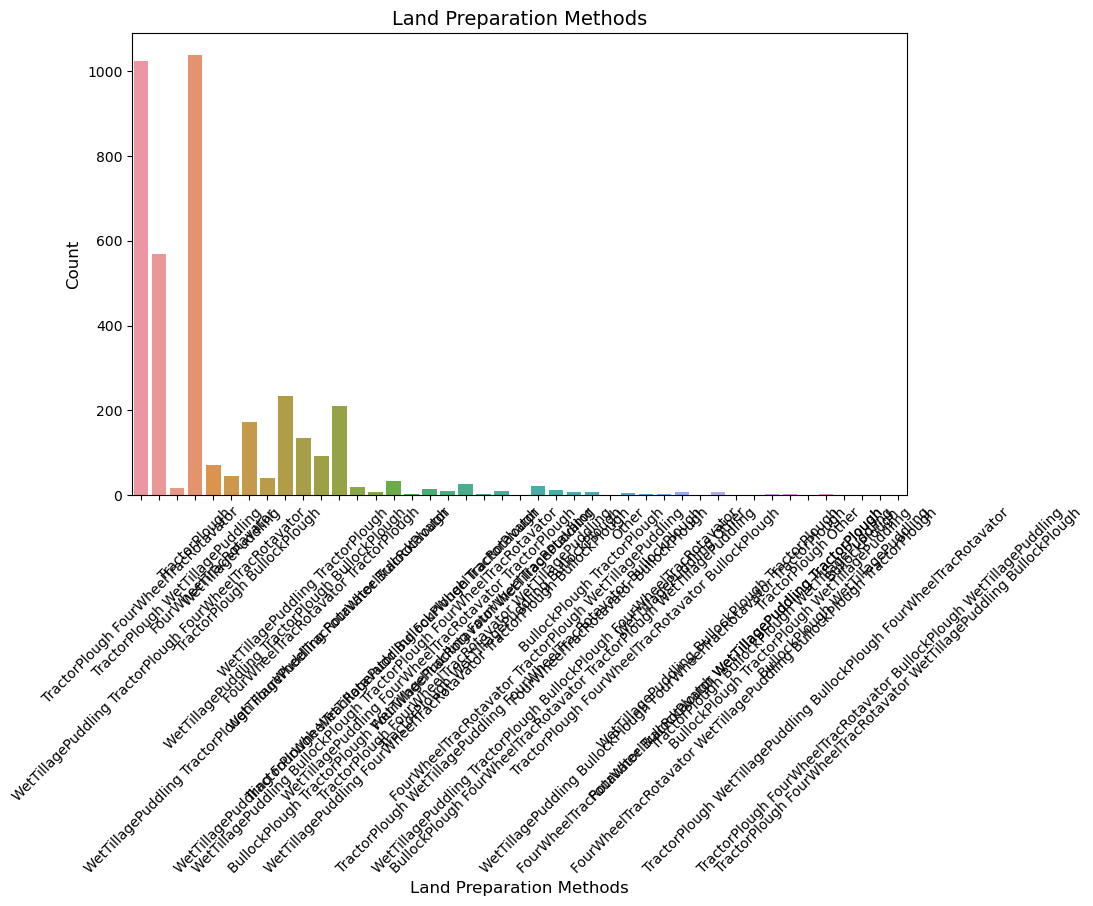

In [14]:
# Land Prep Methods
plt.figure(figsize=(10, 6))
sns.countplot(x='LandPreparationMethod', data=train)
plt.title('Land Preparation Methods', fontsize=14)
plt.xlabel('Land Preparation Methods', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

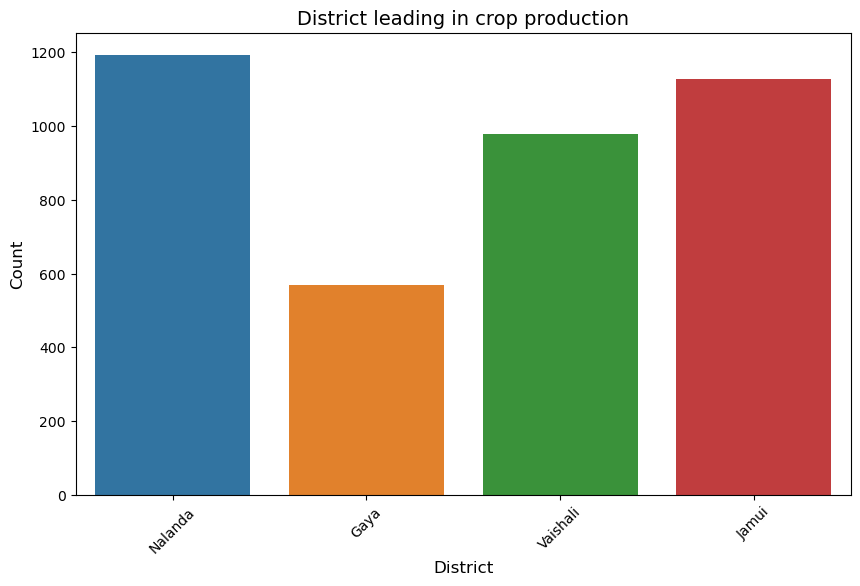

In [15]:
# District leading in crop production
plt.figure(figsize=(10, 6))
sns.countplot(x='District', data=train)
plt.title('District leading in crop production', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

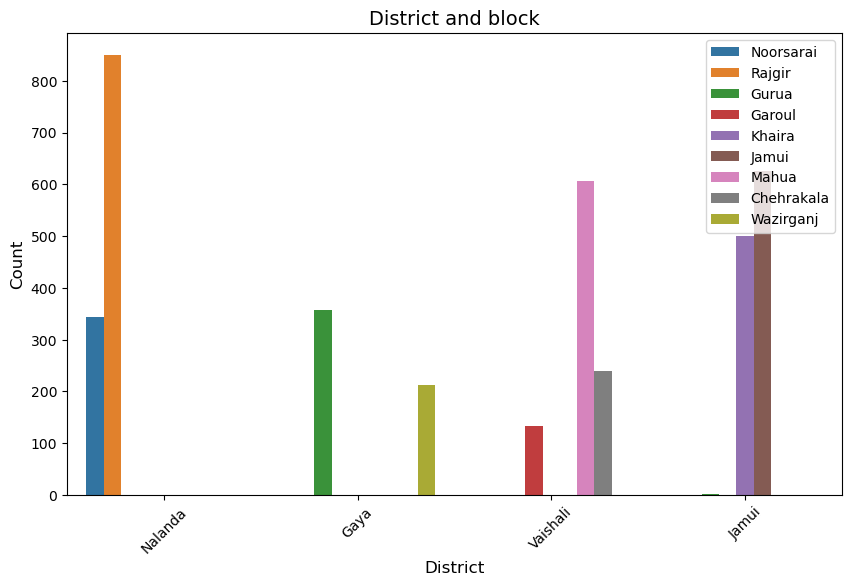

In [16]:
# District and block
plt.figure(figsize=(10, 6))
sns.countplot(x='District', hue='Block', data=train)
plt.title('District and block', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show();

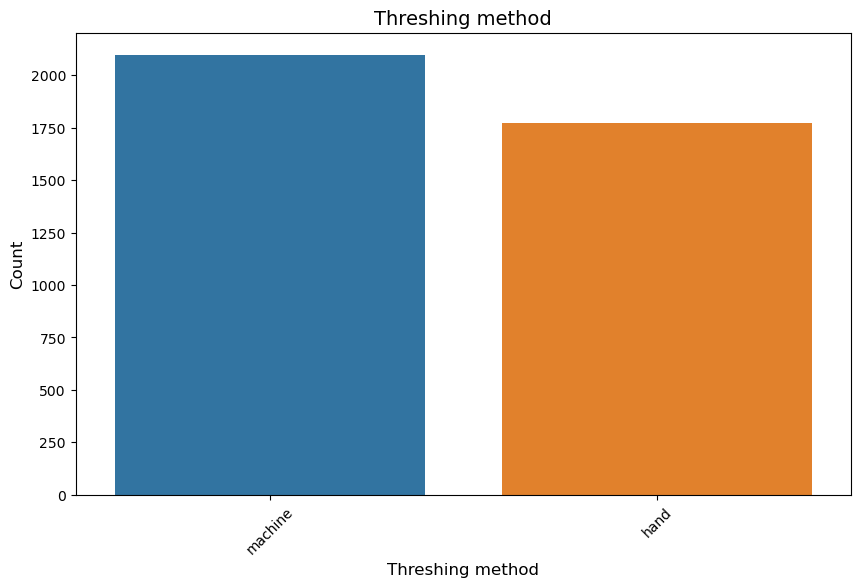

In [18]:
# Threshing method
plt.figure(figsize=(10, 6))
sns.countplot(x='Threshing_method', data=train)
plt.title('Threshing method', fontsize=14)
plt.xlabel('Threshing method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

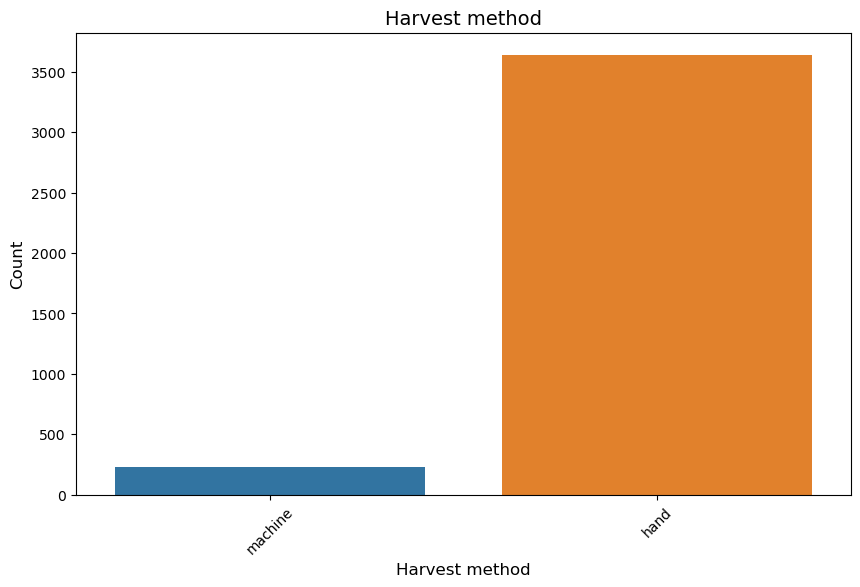

In [20]:
# Harvest method
plt.figure(figsize=(10, 6))
sns.countplot(x='Harv_method', data=train)
plt.title('Harvest method', fontsize=14)
plt.xlabel('Harvest method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [10]:
pd.set_option('display.max_columns', None)
train.head()

,ID,District,Block,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,BasalDAP,BasalUrea,MineralFertAppMethod,FirstTopDressFert,1tdUrea,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield
0,ID_GTFAC7PEVWQ9,Nalanda,Noorsarai,45,40,TractorPlough FourWheelTracRotavator,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,200.000000,2.000000,Ganaura,SoilApplied,2,Urea,11.452359,20.000000,Broadcasting,Urea,15.0,18.0,Broadcasting,machine,2022-11-16,536.622443,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600
1,ID_TK40ARLSPOKS,Nalanda,Rajgir,26,26,WetTillagePuddling TractorPlough FourWheelTrac...,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,5.000000,Boring,Electric,125.000000,3.000000,Ganaura,SoilApplied,2,DAP Urea,15.000000,10.000000,Broadcasting,Urea,20.0,39.0,Broadcasting,hand,2022-11-25,3.000000,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600
2,ID_1FJY2CRIMLZZ,Gaya,Gurua,10,10,TractorPlough FourWheelTracRotavator,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,PreMonsoonShowers IrrigWaterAvailability Labou...,SeedlingAge IrrigWaterAvailability LaborAvaila...,4.000000,Boring,Electric,80.000000,2.000000,Ganaura FYM,SoilApplied,2,DAP,4.000000,13.351801,SoilApplied,Urea,5.0,65.0,RootApplication,hand,2022-12-12,480.000000,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225
3,ID_I3IPXS4DB7NE,Gaya,Gurua,15,15,TractorPlough FourWheelTracRotavator,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,CalendarDate PreMonsoonShowers IrrigWaterAvail...,CalendarDate SeedlingAge RainArrival IrrigWate...,8.017677,Boring,Electric,379.726908,3.247522,Ganaura,SoilApplied,2,DAP Urea,6.000000,3.000000,Broadcasting,Urea,5.0,5.0,Broadcasting,hand,2022-12-02,240.000000,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468
4,ID_4T8YQWXWHB4A,Nalanda,Noorsarai,60,60,TractorPlough WetTillagePuddling,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,CalendarDate IrrigWaterAvailability SeedAvaila...,SeedlingAge RainArrival IrrigWaterAvailability...,9.000000,Boring,Electric,300.000000,2.000000,Ganaura,SoilApplied,2,Urea DAP,15.000000,30.000000,Broadcasting,Urea,30.0,26.0,Broadcasting,machine,2022-11-30,536.622443,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550


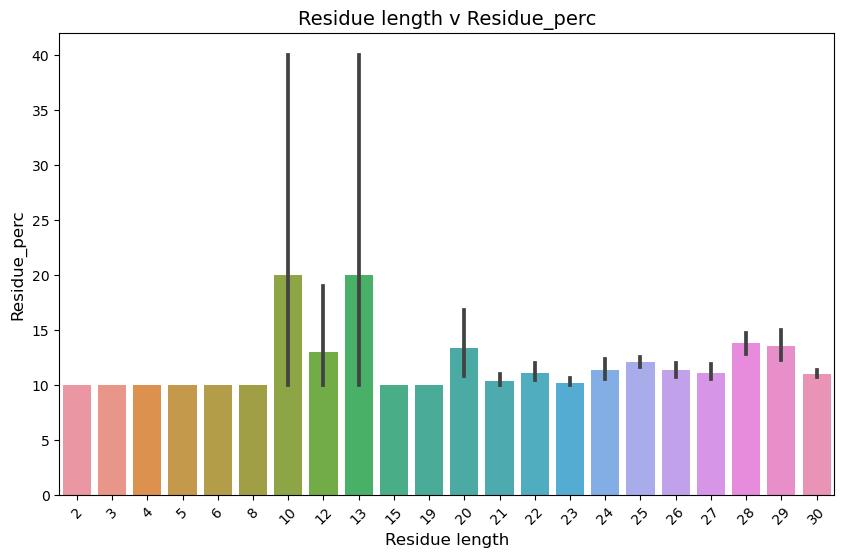

In [23]:
# Residue length v Residue_perc
plt.figure(figsize=(10, 6))
sns.barplot(x='Residue_length', y='Residue_perc', data=train)
plt.title('Residue length v Residue_perc', fontsize=14)
plt.xlabel('Residue length', fontsize=12)
plt.ylabel('Residue_perc', fontsize=12)
plt.xticks(rotation=45)
plt.show();

In [49]:
# Correlation for numerical columns
corr = train.corr()
corr

,CultLand,CropCultLand,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,NoFertilizerAppln,1appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield,bare_land_area,total_fertilizer_applied
CultLand,1.000000,0.969350,0.024248,-0.041040,0.017038,-0.016854,0.139621,-0.042980,0.165884,6.209914e-02,-0.117823,3.816386e-01,0.409604,0.254201,0.434442,0.494520
CropCultLand,0.969350,1.000000,0.035786,-0.035431,0.008512,-0.005998,0.174032,-0.066414,0.178524,4.633984e-02,-0.119789,3.704563e-01,0.394070,0.246221,0.199839,0.469579
CropTillageDepth,0.024248,0.035786,1.000000,-0.044740,0.013024,-0.133897,-0.126158,-0.121384,0.196616,3.828399e-02,-0.027913,-1.679163e-01,-0.001449,-0.002953,-0.034488,0.008269
SeedlingsPerPit,-0.041040,-0.035431,-0.044740,1.000000,-0.004236,0.036239,-0.013095,-0.032590,-0.023383,-2.371386e-02,0.032597,-1.482786e-02,-0.032880,-0.023307,-0.033781,-0.021101
TransplantingIrrigationHours,0.017038,0.008512,0.013024,-0.004236,1.000000,0.124523,-0.067362,0.035053,0.001981,1.569956e-02,0.040401,6.738173e-03,0.017353,-0.007706,0.036747,0.019453
TransIrriCost,-0.016854,-0.005998,-0.133897,0.036239,0.124523,1.000000,-0.119306,0.037947,-0.104369,9.661463e-02,0.054365,-1.254681e-02,0.344167,0.264303,-0.045228,0.217060
StandingWater,0.139621,0.174032,-0.126158,-0.013095,-0.067362,-0.119306,1.000000,-0.261204,0.209803,-3.451936e-03,-0.162629,1.844249e-02,0.030222,0.000100,-0.081186,0.058636
NoFertilizerAppln,-0.042980,-0.066414,-0.121384,-0.032590,0.035053,0.037947,-0.261204,1.000000,-0.088887,-5.860075e-03,0.195066,-2.951250e-02,-0.011640,-0.020704,0.072068,-0.169503
1appDaysUrea,0.165884,0.178524,0.196616,-0.023383,0.001981,-0.104369,0.209803,-0.088887,1.000000,2.677504e-02,0.092332,8.077555e-02,0.039771,-0.013135,0.007089,0.087246
Harv_hand_rent,0.062099,0.046340,0.038284,-0.023714,0.015700,0.096615,-0.003452,-0.005860,0.026775,1.000000e+00,-0.075782,8.865529e-17,0.239458,0.177117,0.077776,0.173636


<Axes: >

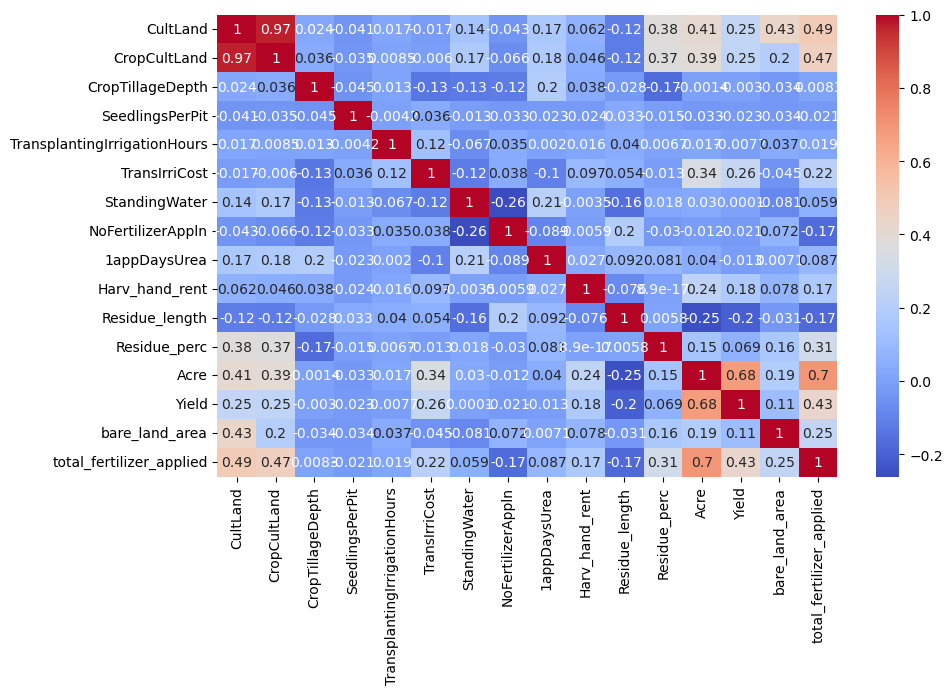

In [50]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [63]:
# Pick columns with correlation greater than 0.5
corr_cols = corr[corr['Yield'] > 0.2].index.tolist()
corr_cols.remove('Yield')
corr_cols.remove('Acre')

# Feature Engineering

In [64]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Combinehe train and tundefinedtest datasets
combined = pd.concat([train, test])

# Convert all object columns to string
for col in combined.columns:
    if combined[col].dtype == 'object':
        combined[col] = combined[col].astype(str)

# Fit the LabelEncoder on the combined dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in combined.columns:
    if combined[col].dtype == 'object' and col not in ['ID', 'Yield']:
        combined[col] = le.fit_transform(combined[col])

# Split the datasets back
train = combined[:train.shape[0]]
test = combined[train.shape[0]:]

# Modelling

In [53]:
# Combine the datasets
#combined = pd.concat([train.drop('Yield', axis=1), test])

# Perform one-hot encoding
#combined = pd.get_dummies(combined, drop_first=True)

# Split the datasets back
#X = combined[:train.shape[0]]
#test = combined[train.shape[0]:]

# Now you can continue with your model training and prediction


In [65]:
train.shape, test.shape

((3870, 38), (1290, 38))

In [68]:
train.head()

,ID,CultLand,CropCultLand,LandPreparationMethod,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,NursDetFactor,TransDetFactor,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,StandingWater,OrgFertilizers,PCropSolidOrgFertAppMethod,NoFertilizerAppln,CropbasalFerts,MineralFertAppMethod,FirstTopDressFert,1appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,block_district,bare_land_area,total_fertilizer_applied
0,ID_GTFAC7PEVWQ9,45,40,18,51,5,3,26,20,2.0,11,49,5.000000,0,1,200.000000,2.000000,7,2,2,27,0,11,18.0,0,1,59,536.622443,43,1,30,40,1,0.312500,600.0,6,5,46.452359
1,ID_TK40ARLSPOKS,26,26,42,49,5,3,19,19,2.0,25,49,5.000000,0,1,125.000000,3.000000,7,2,2,10,0,11,39.0,0,0,68,3.000000,81,1,24,10,1,0.312500,600.0,7,0,45.000000
2,ID_1FJY2CRIMLZZ,10,10,18,31,6,3,19,43,2.0,104,145,4.000000,0,1,80.000000,2.000000,8,2,2,0,2,11,65.0,1,0,85,480.000000,99,1,30,10,1,0.148148,225.0,0,0,22.351801
3,ID_I3IPXS4DB7NE,15,15,18,17,6,3,16,16,2.0,25,49,8.017677,0,1,379.726908,3.247522,7,2,2,10,0,11,5.0,0,0,75,240.000000,86,0,26,10,1,0.222222,468.0,0,0,14.000000
4,ID_4T8YQWXWHB4A,60,60,24,50,4,3,20,19,2.0,11,164,9.000000,0,1,300.000000,2.000000,7,2,2,28,0,11,26.0,0,1,73,536.622443,59,1,24,40,1,0.468750,550.0,6,0,75.000000


In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3870 entries, 0 to 3869
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   CultLand                            3870 non-null   int64  
 2   CropCultLand                        3870 non-null   int64  
 3   LandPreparationMethod               3870 non-null   int32  
 4   CropTillageDate                     3870 non-null   int32  
 5   CropTillageDepth                    3870 non-null   int64  
 6   CropEstMethod                       3870 non-null   int32  
 7   RcNursEstDate                       3870 non-null   int32  
 8   SeedingSowingTransplanting          3870 non-null   int32  
 9   SeedlingsPerPit                     3870 non-null   float64
 10  NursDetFactor                       3870 non-null   int32  
 11  TransDetFactor                      3870 no

In [66]:

features = corr_cols
X = train[features]
#X = train.drop(['ID', 'Yield'], axis=1)
y = train['Yield']

In [62]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Train the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
preds = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
print("The RMSE of the model is: {}".format(np.sqrt(mean_squared_error(y_test, preds))))

The RMSE of the model is: 800.6846264335953


In [57]:
# Make predictions on the test set
test_pred = rf.predict(test.drop(['ID', 'Yield'], axis=1))
#test_pred = xgb.predict(test)
sample = pd.read_csv('SampleSubmission.csv')
# Create submission file
sub = pd.DataFrame({'ID': sample['ID'], 'Yield': test_pred})
sub.to_csv('suub.csv', index=False)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, lr_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, lr_pred)))

Mean Squared Error:  637676.9144800163
rmse:  798.5467515931778


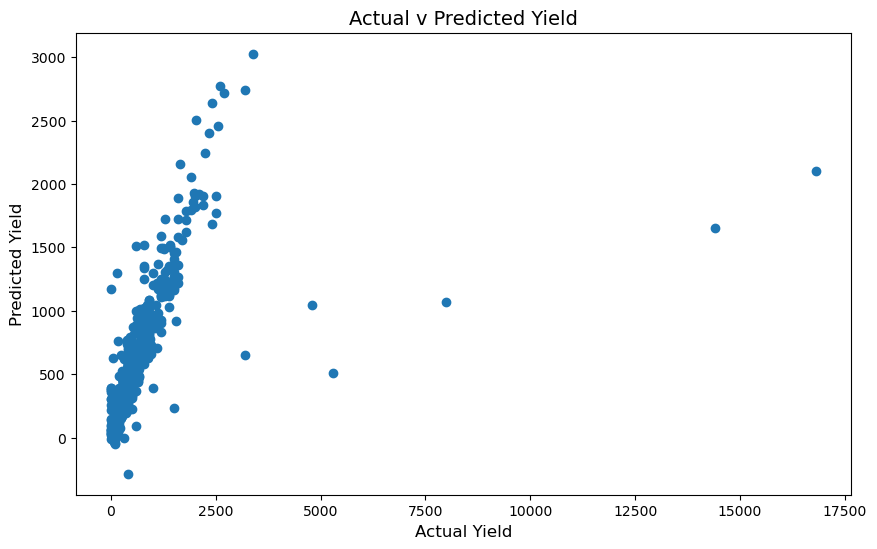

In [154]:
# Visualize the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.title('Actual v Predicted Yield', fontsize=14)
plt.show();

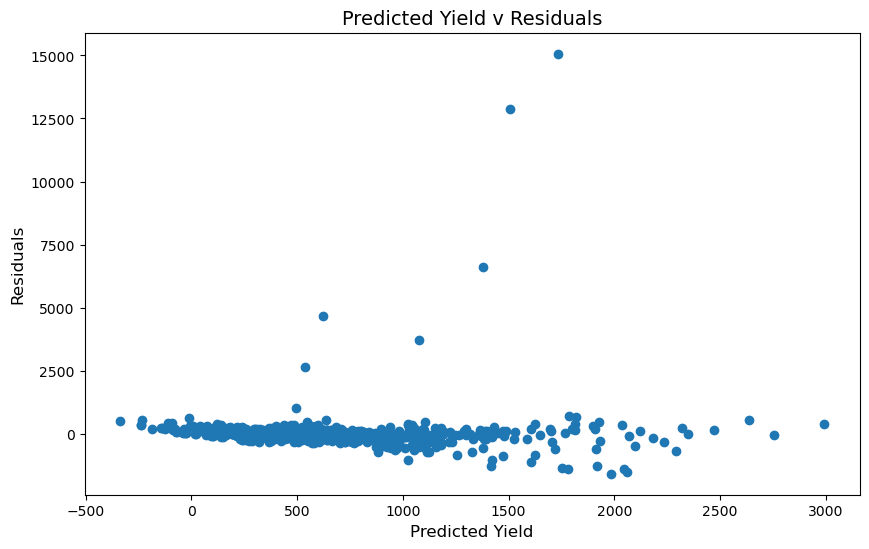

In [92]:
# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(lr_pred, y_test - lr_pred)
plt.xlabel('Predicted Yield', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Predicted Yield v Residuals', fontsize=14)
plt.show();

In [60]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=42)

xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print('Mean Squared Error: ', mean_squared_error(y_test, xgb_pred))
print('rmse: ', np.sqrt(mean_squared_error(y_test, xgb_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, xgb_pred))
print('R2 Score: ', r2_score(y_test, xgb_pred))

# Visualize the difference between actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Yield', fontsize=12)
plt.ylabel('Predicted Yield', fontsize=12)
plt.title('Actual v Predicted Yield', fontsize=14)
plt.show();

Mean Squared Error:  663858.4930519486
rmse:  814.7751180859345


NameError: name 'mean_absolute_error' is not defined